In [7]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as s; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [8]:
dataset=pd.read_csv('dataset.csv')

In [9]:
dataset

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [6]:
dataset.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [7]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [7]:
dataset.size

606

In [8]:
dataset.shape

(303, 2)

In [8]:
len(dataset) # of rows

303

In [9]:
dataset.describe().transpose() #descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


Text(0.5, 0, 'Income / spend')

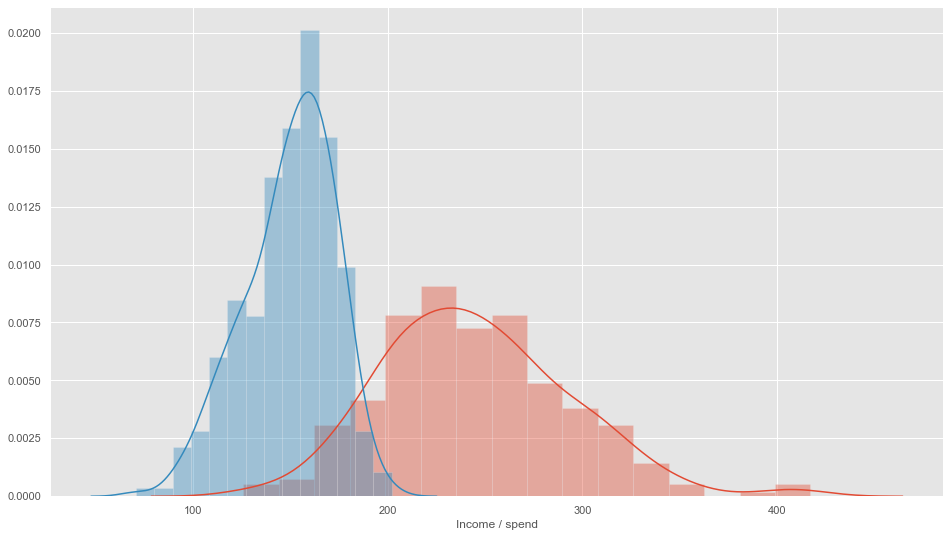

In [5]:
#Visualising the data using matplotlib
plot_income = s.distplot(dataset["INCOME"])
plot_spend = s.distplot(dataset["SPEND"])
plt.xlabel('Income / spend')

[(0, 420)]

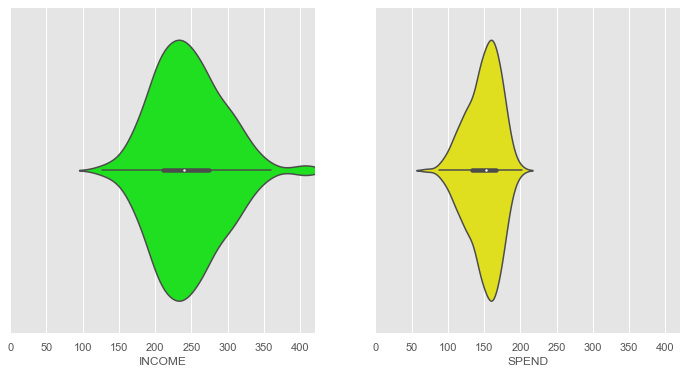

In [12]:
#income and spend analysis 

f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
f1 = s.violinplot(data=dataset, x='INCOME', color="lime",ax=axes[0])
f2 = s.violinplot(data=dataset, x='SPEND',color="yellow", ax=axes[1])
f1.set(xlim=(0,420))

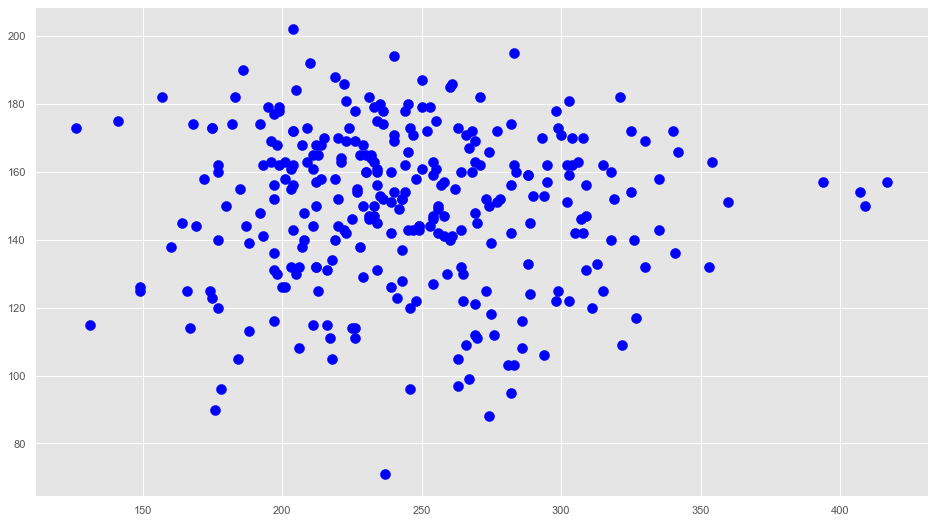

In [13]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='blue', s=100)

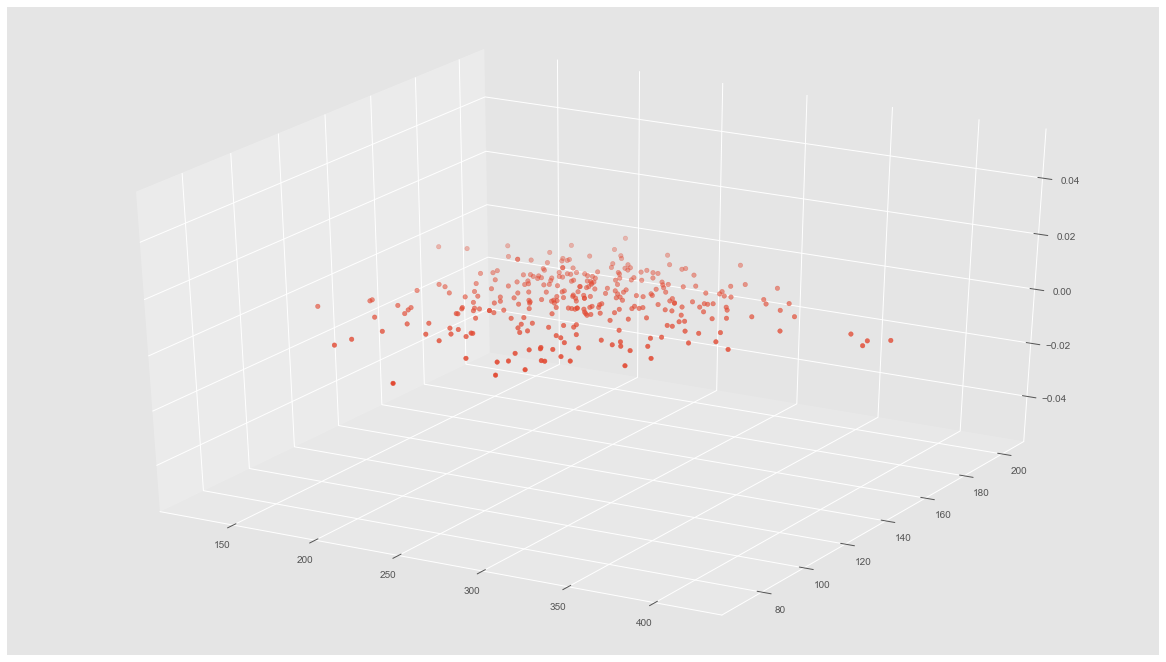

In [13]:
##representating the plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

Clustering fundamentals

In [15]:
X=dataset.iloc[:,[0,1]].values
print(X)

[[233 150]
 [250 187]
 [204 172]
 [236 178]
 [354 163]
 [192 148]
 [294 153]
 [263 173]
 [199 162]
 [168 174]
 [239 160]
 [275 139]
 [266 171]
 [211 144]
 [283 162]
 [219 158]
 [340 172]
 [226 114]
 [247 171]
 [239 151]
 [234 161]
 [233 179]
 [226 178]
 [243 137]
 [199 178]
 [302 162]
 [212 157]
 [175 123]
 [417 157]
 [197 152]
 [198 168]
 [177 140]
 [219 188]
 [273 152]
 [213 125]
 [177 160]
 [304 170]
 [232 165]
 [269 148]
 [360 151]
 [308 142]
 [245 180]
 [208 148]
 [264 143]
 [321 182]
 [325 172]
 [235 180]
 [257 156]
 [216 115]
 [234 160]
 [256 149]
 [302 151]
 [231 146]
 [141 175]
 [252 172]
 [201 158]
 [222 186]
 [260 185]
 [182 174]
 [303 159]
 [265 130]
 [309 156]
 [186 190]
 [203 132]
 [211 165]
 [183 182]
 [222 143]
 [234 175]
 [220 170]
 [209 163]
 [258 147]
 [227 154]
 [204 202]
 [261 186]
 [213 165]
 [250 161]
 [245 166]
 [221 164]
 [205 184]
 [240 154]
 [250 179]
 [308 170]
 [318 160]
 [298 178]
 [265 122]
 [264 160]
 [277 151]
 [197 156]
 [214 158]
 [248 122]
 [255 175]

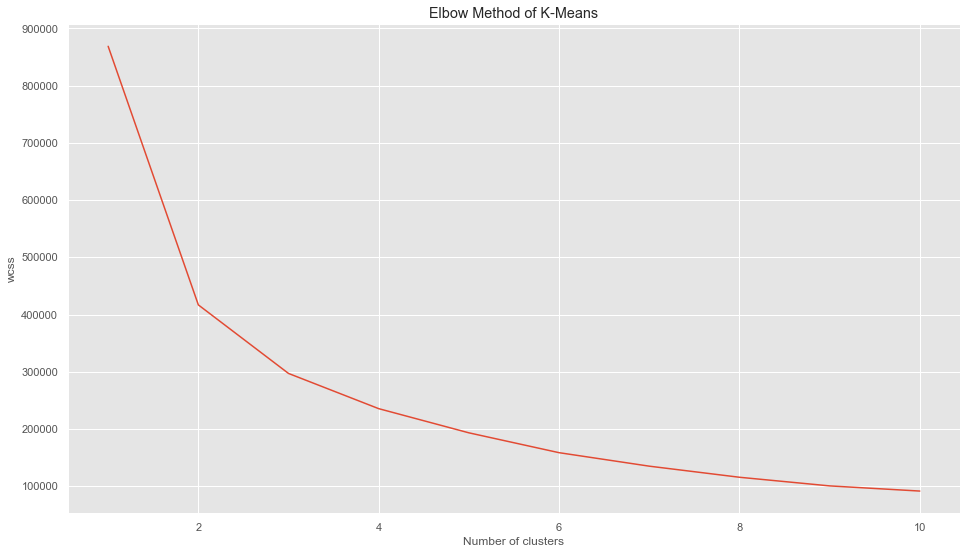

In [19]:
#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method of K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
    

In [23]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for i in range(2, 11):
    kmeans = KMeans(n_clusters=i).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For no of clusters={}, The Silhouette Coefficient is {}".format(i, sil_coeff))

For no of clusters=2, The Silhouette Coefficient is 0.44006694211403197
For no of clusters=3, The Silhouette Coefficient is 0.35962629048722355
For no of clusters=4, The Silhouette Coefficient is 0.3618396084064086
For no of clusters=5, The Silhouette Coefficient is 0.36210339735856734
For no of clusters=6, The Silhouette Coefficient is 0.367075543561368
For no of clusters=7, The Silhouette Coefficient is 0.35871463168589846
For no of clusters=8, The Silhouette Coefficient is 0.36093909283183023
For no of clusters=9, The Silhouette Coefficient is 0.3598497110991832
For no of clusters=10, The Silhouette Coefficient is 0.3468017139489749


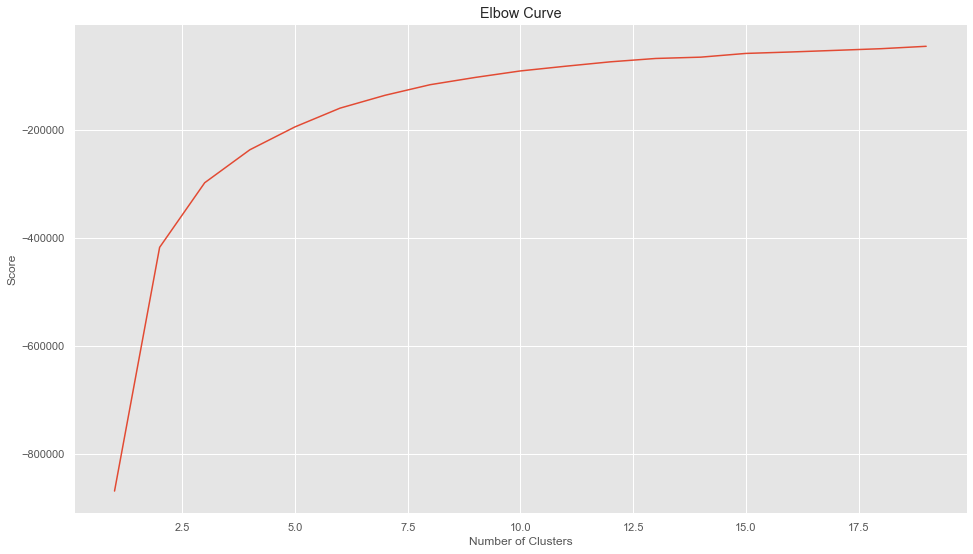

[-868805.478547855, -416914.67764462164, -297101.3764201936, -236053.56019668758, -193627.73456258298, -158852.22654544096, -134957.6383075263, -115345.86869913021, -101868.75957814729, -89842.48195663505, -81114.19065792694, -72903.43697626374, -66720.92473667198, -64272.537590145046, -57361.89748811663, -54691.00630350408, -51658.885901030764, -48585.47771447917, -44145.15128876036]


In [24]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [18]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 868805.4785478548
k: 2  cost: 416914.67764462065
k: 3  cost: 297101.3764201943
k: 4  cost: 235568.75630353513
k: 5  cost: 193333.51167275637
k: 6  cost: 158999.20745160058
k: 7  cost: 135314.10167803388
k: 8  cost: 115686.57935998778
k: 9  cost: 102546.93727877043
k: 10  cost: 91556.28599714936



In [19]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

In [26]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

NameError: name 'y_means' is not defined

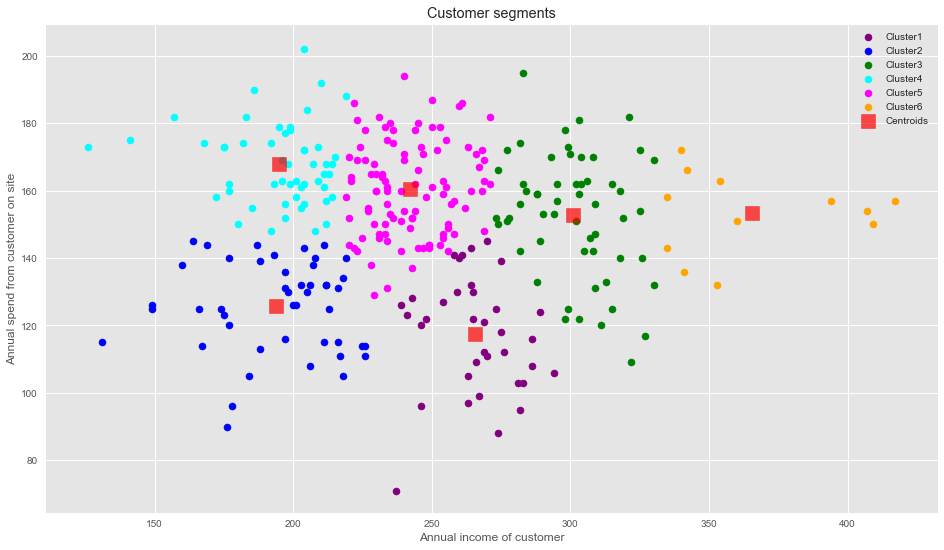

In [53]:
#Visualising the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

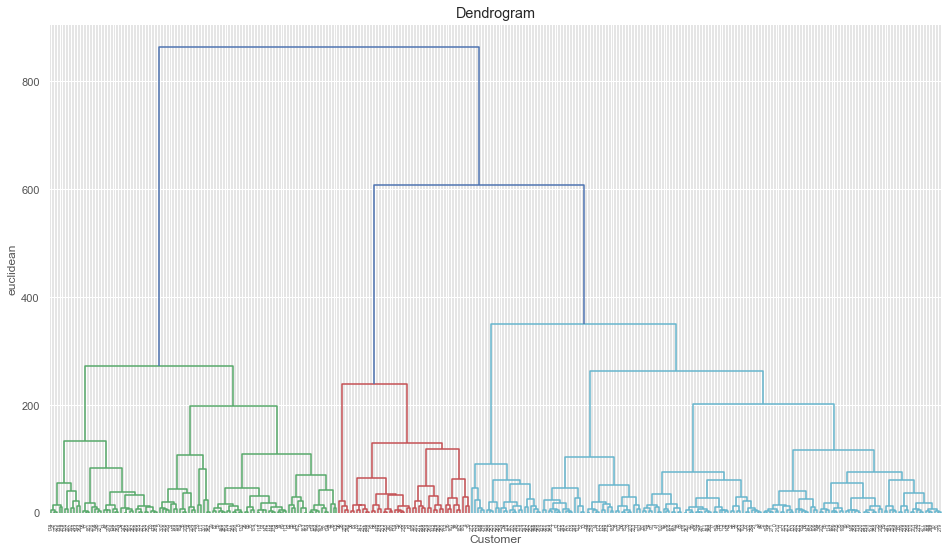

In [27]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

In [28]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

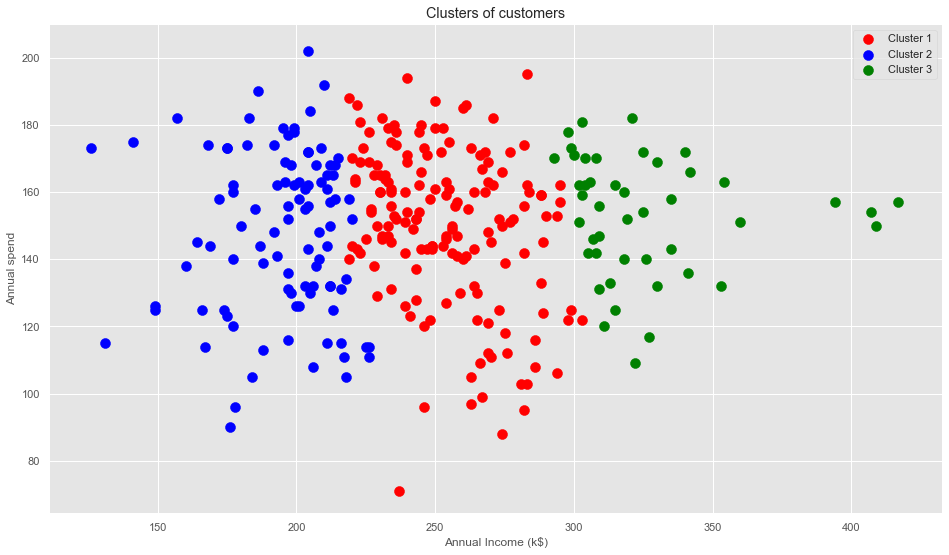

In [29]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()